# Psych 45: Stroop stats

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='poster', font_scale=1.5)

## Import data file

In [10]:
data = pd.read_csv('/Users/annakhazenzon/Documents/teaching/psych45/Psych45/WWW/demo_files/Psych45_stroop_stats_2017.csv')
data.drop('when', axis=1, inplace=True)

data.time_normal = data.time_normal.str.strip(' ms').str.replace(',', '').astype(float)
data.time_interfere = data.time_interfere.str.strip(' ms').str.replace(',', '').astype(float)

data['time_diff'] = data.time_interfere - data.time_normal

#### Remove outliers

In [4]:
max_rt = data.time_interfere.mean() + 2*data.time_interfere.std()
data = data.loc[data.time_interfere < max_rt]

In [12]:
data.head()

,pct_correct,time_normal,time_interfere,time_diff
0,100,603.61,873.47,269.86
1,100,842.58,1286.07,443.49
2,100,673.37,1100.48,427.11
3,100,1089.52,1210.64,121.12


## Analyses

#### Summary stats

In [13]:
data.describe()

,pct_correct,time_normal,time_interfere,time_diff
count,4.0,4.000000,4.000000,4.000000
mean,100.0,802.270000,1117.665000,315.395000
std,0.0,216.193173,179.750862,151.332726
min,100.0,603.610000,873.470000,121.120000
25%,100.0,655.930000,1043.727500,232.675000
50%,100.0,757.975000,1155.560000,348.485000
75%,100.0,904.315000,1229.497500,431.205000
max,100.0,1089.520000,1286.070000,443.490000


### What is the distribution of overall accuracy?

LinAlgError: singular matrix

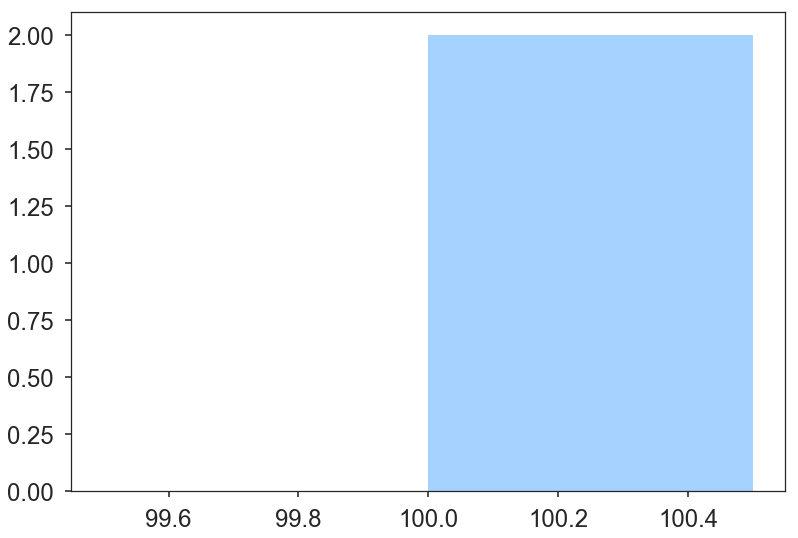

In [15]:
g = sns.distplot(data.pct_correct, rug=True,
                 color='dodgerblue')
g.set_xlabel('% correct')
sns.despine(trim=True)

### How does condition affect response time?

In [17]:
data_long = pd.melt(data, ['pct_correct'])
data_long = data_long.loc[data_long.variable.isin(['time_normal', 'time_interfere'])]
data_long.loc[data_long.variable == 'time_normal', 'variable'] = 'congruent'
data_long.loc[data_long.variable == 'time_interfere', 'variable'] = 'incongruent'

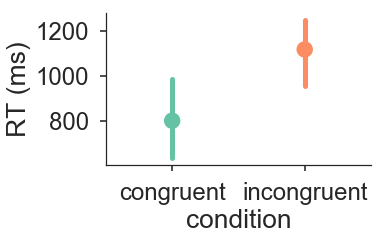

In [18]:
g = sns.factorplot(x='variable', y='value', 
                   aspect=1.5, ci=95,
                   data=data_long, palette='Set2')
g.set_ylabels('RT (ms)')
g.set_xlabels('condition')
plt.locator_params(nbins=5)

### What is the distribution of RTs for incongruent vs. congruent trials?

How much *longer* does it take to respond to an incongruent vs. a congruent trial?

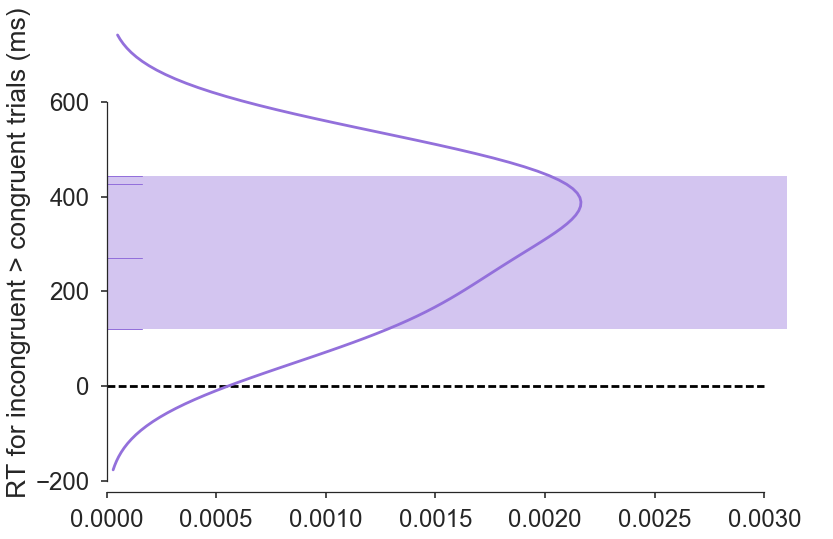

In [19]:
g = sns.distplot(data.time_diff, rug=True, 
                 color='mediumpurple', vertical=True)
g.set_ylabel('RT for incongruent > congruent trials (ms)')
g.hlines(0, 0, .003, linestyles='dashed')
sns.despine(trim=True)